In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
app = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')
app_desc = pd.read_csv('columns_description.csv')

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [7]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
app.shape

(307511, 122)

In [9]:
msng_info = app.isnull().sum().sort_values().reset_index()
msng_info.rename(columns={'index':'col_name', 0:'null_count'},inplace=True)
msng_info

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0
5,REG_CITY_NOT_WORK_CITY,0
6,LIVE_CITY_NOT_WORK_CITY,0
7,ORGANIZATION_TYPE,0
8,FLAG_DOCUMENT_21,0
9,FLAG_DOCUMENT_20,0


In [10]:
msng_info['msng_pct']= (msng_info['null_count']/app.shape[0])*100
msng_info.to_excel('missing_info.xlsx',index=False)
msng_info.head()

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [11]:
msng_col = msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()
len(msng_col)

49

In [12]:
app_msng_rmvd = app.drop(labels=msng_col,axis=1)
app_msng_rmvd.shape

(307511, 73)

In [13]:
flag_col = []

for col in app_msng_rmvd.columns:
    if col.startswith('FLAG_'):
        flag_col.append(col)
        
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [14]:
flag_tgt_col = app_msng_rmvd[flag_col+['TARGET']]
flag_tgt_col.shape

(307511, 29)

<AxesSubplot:xlabel='FLAG_DOCUMENT_19', ylabel='count'>

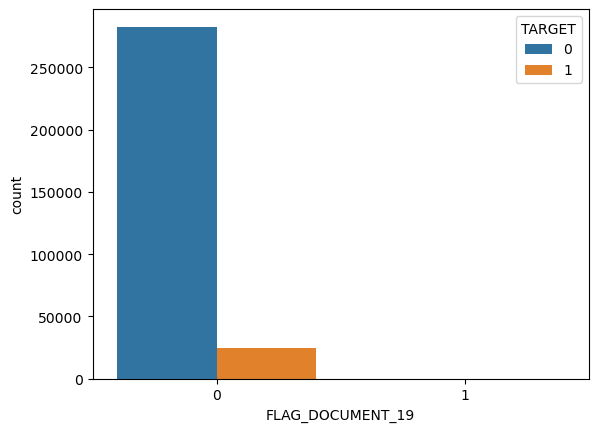

In [15]:
sns.countplot(data=flag_tgt_col,x='FLAG_DOCUMENT_19',hue='TARGET')

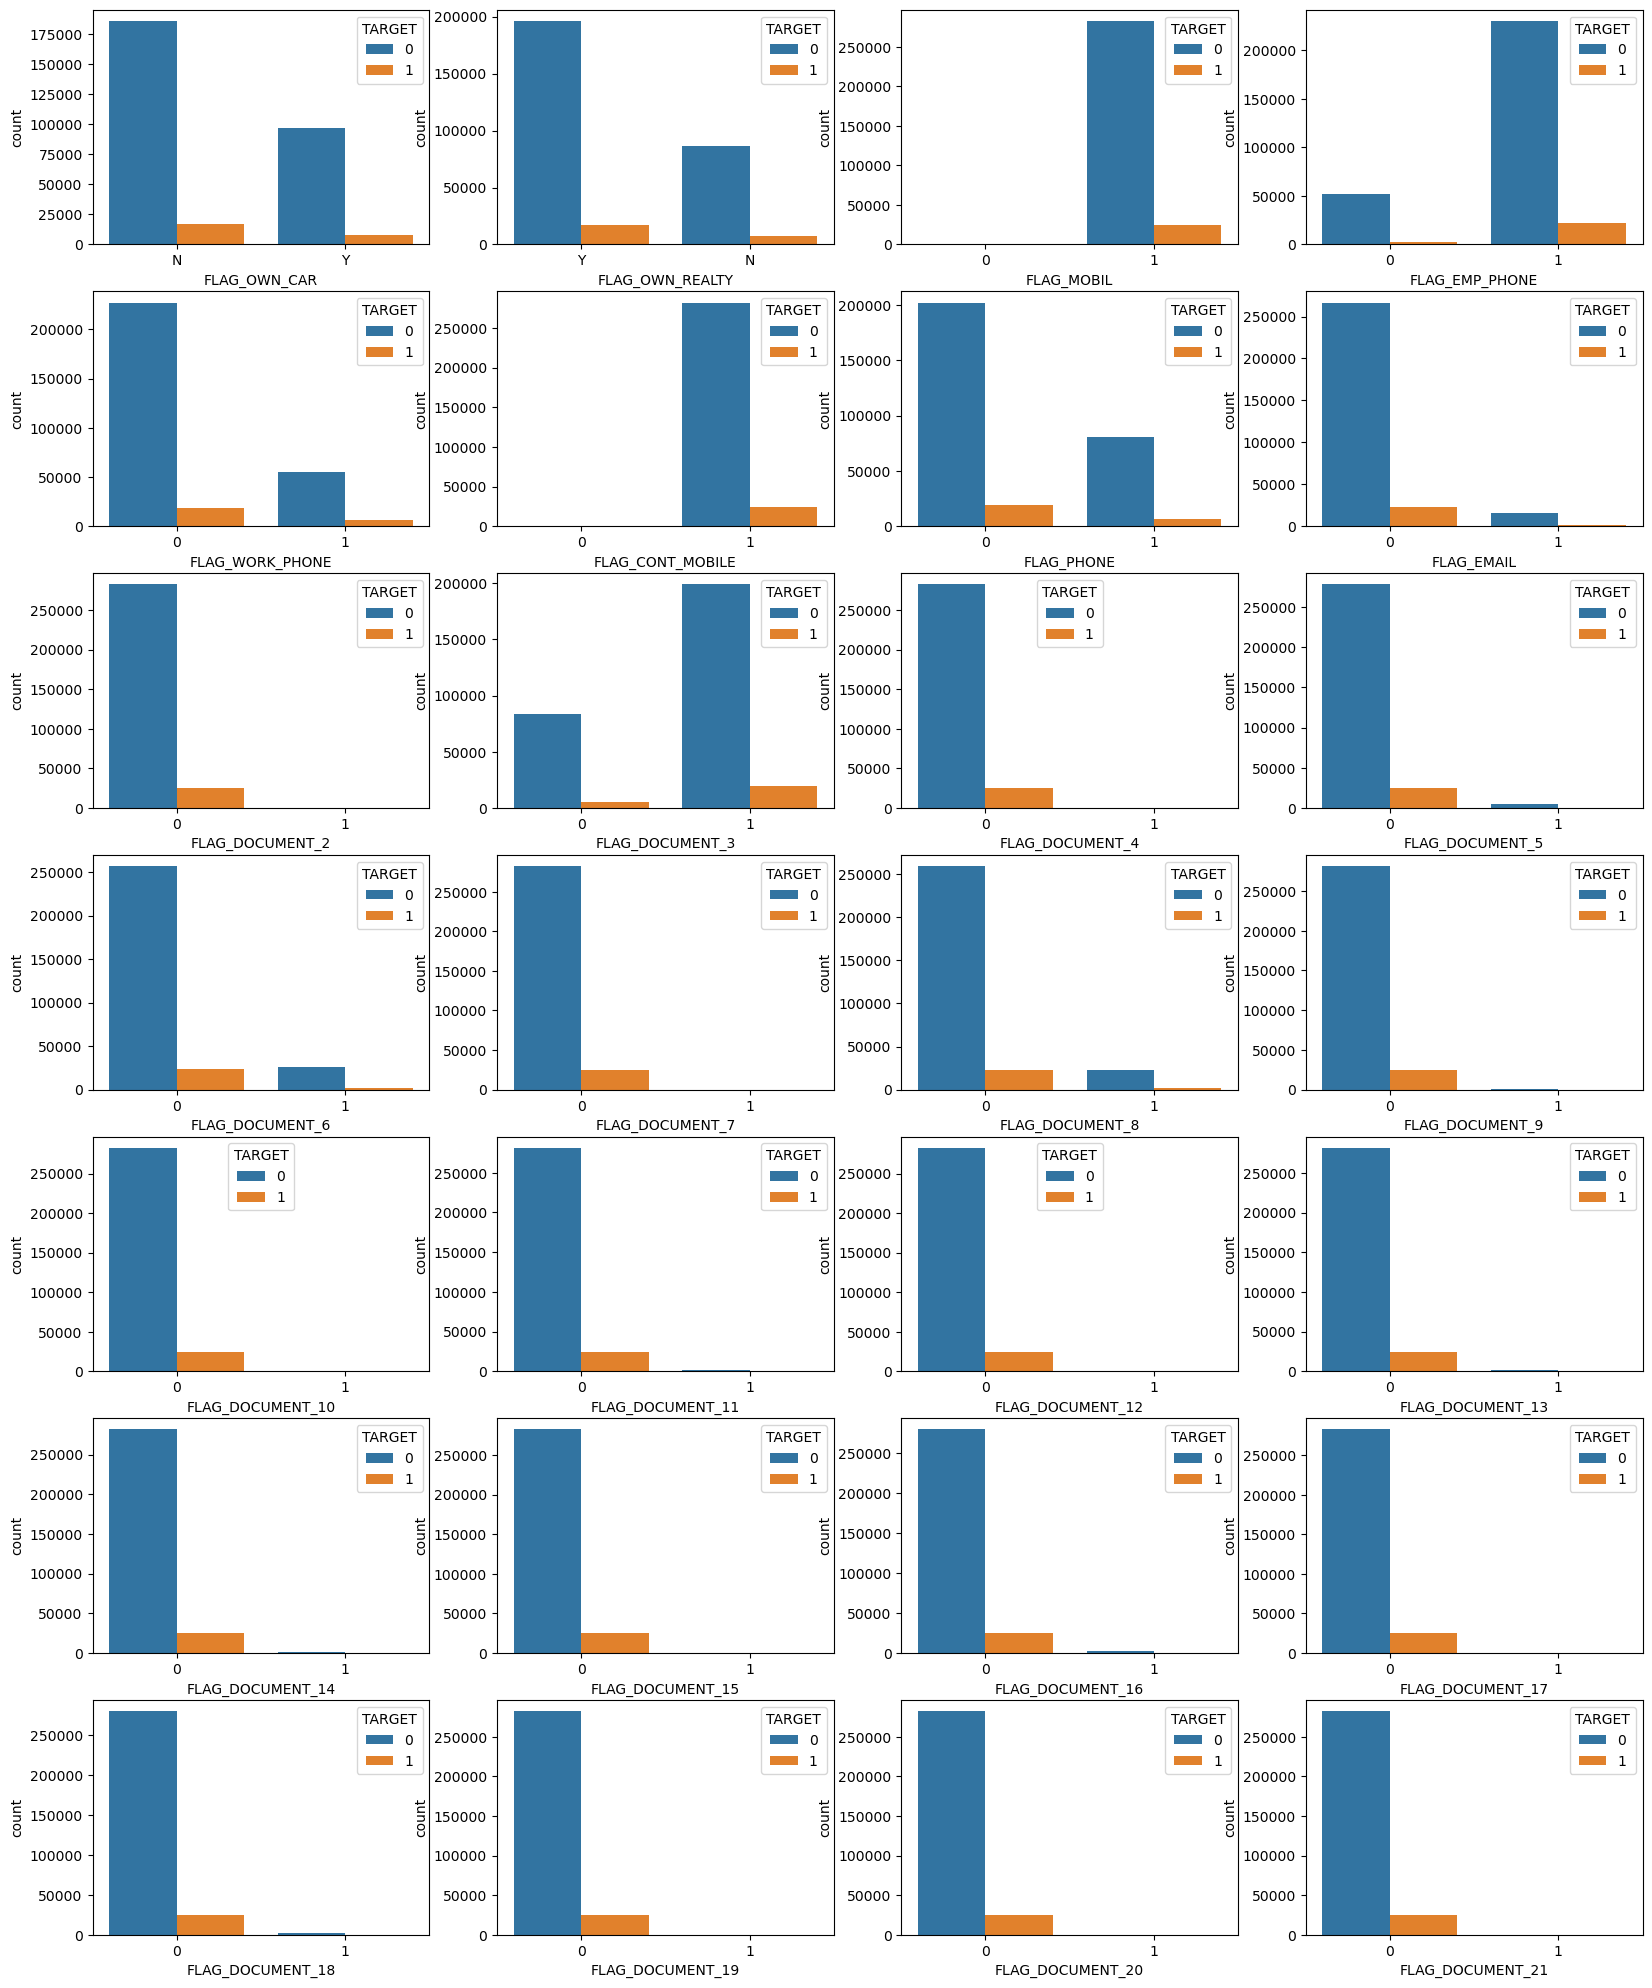

In [16]:
plt.figure(figsize=(20,25))
for i, col in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col,x=col,hue='TARGET')

In [17]:
fig_corr =['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
         'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flag_corr_df = app_msng_rmvd[fig_corr]
flag_corr_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [18]:
flag_corr_df['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [19]:
flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

flag_corr_df['FLAG_OWN_CAR'].value_counts()

C:\Users\ruhit\AppData\Local\Temp\ipykernel_21520\2397861175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\ruhit\AppData\Local\Temp\ipykernel_21520\2397861175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64

In [20]:
corr_df = round(flag_corr_df.corr(),2)
corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_OWN_CAR,1.00,-0.00,-0.0,0.15,0.01,-0.01,-0.01,0.03,-0.02
FLAG_OWN_REALTY,-0.00,1.00,-0.0,-0.07,-0.11,0.01,-0.04,0.03,-0.01
FLAG_MOBIL,-0.00,-0.00,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,0.15,-0.07,-0.0,1.00,0.23,-0.01,-0.02,0.06,0.05
FLAG_WORK_PHONE,0.01,-0.11,0.0,0.23,1.00,0.02,0.29,-0.01,0.03
FLAG_CONT_MOBILE,-0.01,0.01,-0.0,-0.01,0.02,1.00,0.01,-0.01,0.00
FLAG_PHONE,-0.01,-0.04,0.0,-0.02,0.29,0.01,1.00,0.01,-0.02
FLAG_EMAIL,0.03,0.03,0.0,0.06,-0.01,-0.01,0.01,1.00,-0.00
TARGET,-0.02,-0.01,0.0,0.05,0.03,0.00,-0.02,-0.00,1.00


<AxesSubplot:>

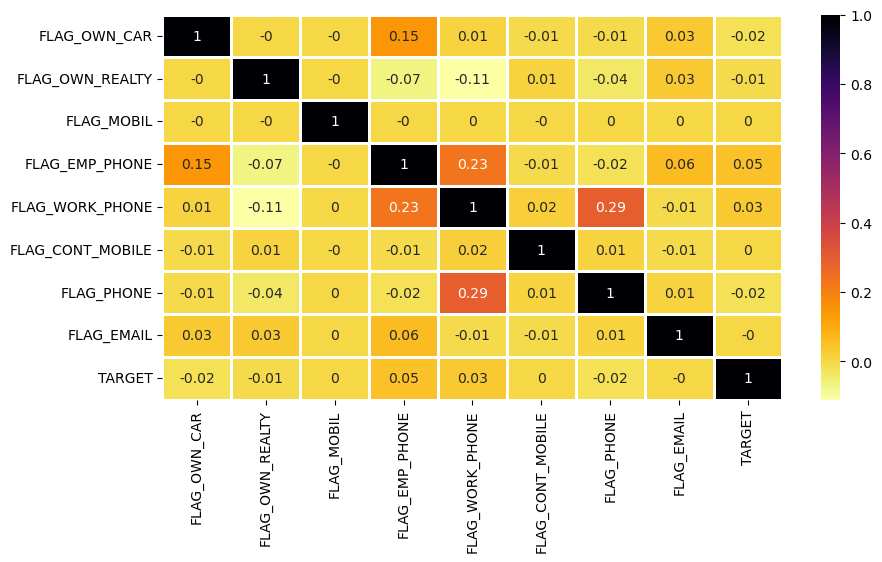

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,cmap='inferno_r',linewidth=2,annot=True)

In [22]:
app_flag_rmvd = app_msng_rmvd.drop(labels=flag_col,axis=1)

app_flag_rmvd.shape

(307511, 45)

In [23]:
app_flag_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
corr_df2 = round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2)
corr_df2

,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_2,1.00,0.11,-0.16
EXT_SOURCE_3,0.11,1.00,-0.18
TARGET,-0.16,-0.18,1.00


<AxesSubplot:>

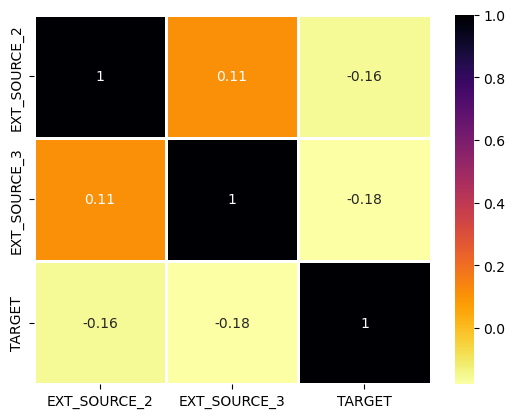

In [25]:
sns.heatmap(corr_df2,cmap='inferno_r',linewidth=2,annot=True)

In [26]:
app_ext_rmvd = app_flag_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_ext_rmvd.shape

(307511, 43)

In [27]:
(app_ext_rmvd.isnull().sum().sort_values()/app_ext_rmvd.shape[0])*100

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_RATING_CLIENT            0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
CODE_GENDER                     0.000000
NAME_INCOME_TYPE

In [28]:
app_ext_rmvd['CNT_FAM_MEMBERS']= app_ext_rmvd['CNT_FAM_MEMBERS'].fillna(app_ext_rmvd['CNT_FAM_MEMBERS'].mode()[0])
app_ext_rmvd['CNT_FAM_MEMBERS'].isnull().sum()

0

In [29]:
app_ext_rmvd['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [30]:
app_ext_rmvd['OCCUPATION_TYPE']= app_ext_rmvd['OCCUPATION_TYPE'].fillna(app_ext_rmvd['OCCUPATION_TYPE'].mode()[0])
app_ext_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [31]:
app_ext_rmvd['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [32]:
app_ext_rmvd['NAME_TYPE_SUITE'].isnull().sum()

1292

In [33]:
app_ext_rmvd['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [34]:
app_ext_rmvd['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [35]:
app_ext_rmvd['NAME_TYPE_SUITE']= app_ext_rmvd['NAME_TYPE_SUITE'].fillna(app_ext_rmvd['NAME_TYPE_SUITE'].mode()[0])
app_ext_rmvd['NAME_TYPE_SUITE'].isnull().sum()

0

In [36]:
app_ext_rmvd['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [37]:
app_ext_rmvd['AMT_ANNUITY'] = app_ext_rmvd['AMT_ANNUITY'].fillna(app_ext_rmvd['AMT_ANNUITY'].mean())
app_ext_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [38]:
app_ext_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [39]:
amt_req_col = []
for col in app_ext_rmvd.columns:
    if col.startswith('AMT_REQ_CREDIT_BUREAU'):
        amt_req_col.append(col)
        
amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [40]:
for col in amt_req_col:
    app_ext_rmvd[col] = app_ext_rmvd[col].fillna(app_ext_rmvd[col].median())

In [42]:
app_ext_rmvd.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_QRT         0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
CNT_FAM_MEMBERS                   0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
DAYS_REGISTRATION                 0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
DAYS_ID_PUBLISH                   0
AMT_ANNUITY                       0
AMT_CREDIT                  

In [43]:
app_ext_rmvd['AMT_GOODS_PRICE'].isnull().sum()

278

In [44]:
app_ext_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [45]:
app_ext_rmvd['AMT_GOODS_PRICE'] = app_ext_rmvd['AMT_GOODS_PRICE'].fillna(app_ext_rmvd['AMT_GOODS_PRICE'].median())

In [46]:
app_ext_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [47]:
days_col=[]
for col in app_ext_rmvd.columns:
    if col.startswith('DAYS'):
        days_col.append(col)

In [50]:
for col in days_col:
    app_ext_rmvd[col]= abs(app_ext_rmvd[col])

In [51]:
app_ext_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
app_ext_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [54]:
app_ext_rmvd.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [57]:
app_ext_rmvd['AMT_GOODS_PRICE'].agg(['min','mean','max','median'])

min       4.050000e+04
mean      5.383163e+05
max       4.050000e+06
median    4.500000e+05
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

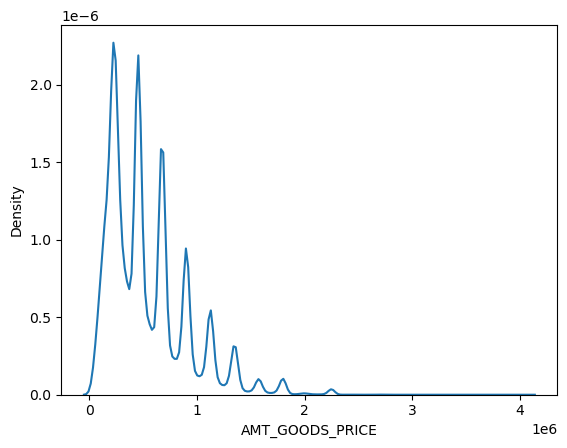

In [58]:
sns.kdeplot(data=app_ext_rmvd,x='AMT_GOODS_PRICE')

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Count'>

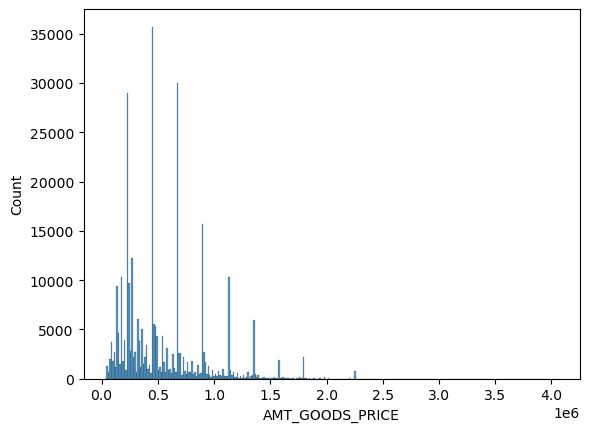

In [61]:
sns.histplot(data=app_ext_rmvd,x='AMT_GOODS_PRICE')

In [62]:
app_ext_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [63]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100K-200K','200-300K','300-400K','400-500K','500-600K','600-700K','700-800K','800-900K','Above 900K']
app_ext_rmvd['AMT_GOODS_PRICE_range'] = pd.cut(app_ext_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)

In [64]:
app_ext_rmvd['AMT_GOODS_PRICE_range'].value_counts()

200-300K      62761
400-500K      57251
Above 900K    41880
600-700K      40024
100K-200K     32956
800-900K      21484
300-400K      21219
500-600K      13117
0-100K         8709
700-800K       8110
Name: AMT_GOODS_PRICE_range, dtype: int64

In [66]:
app_ext_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])


0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [67]:
app_ext_rmvd['AMT_INCOME_TOTAL'].max()

117000000.0

In [68]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

app_ext_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_ext_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)


In [69]:
app_ext_rmvd['AMT_INCOME_TOTAL_RANGE'].value_counts()

100K-150K     91591
150K-200K     64307
0-100K        63698
200K-250K     48137
250K-300K     17039
300K-350K      8874
Above 400K     8063
350K-400K      5802
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

In [70]:
app_ext_rmvd['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [72]:
app_ext_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [73]:
app_ext_rmvd['AMT_CREDIT'].max()

4050000.0

In [74]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

app_ext_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_ext_rmvd['AMT_CREDIT'],bins,labels=ranges)

In [76]:
app_ext_rmvd['AMT_CREDIT_RANGE'].value_counts()

200K-400K    81151
400K-600K    66270
1M-2M        47956
600K-800K    43242
0-200K       36144
800K-900K    21792
900K-1M       8927
2M-3M         1997
Above 3M        32
Name: AMT_CREDIT_RANGE, dtype: int64

In [77]:
app_ext_rmvd['AMT_CREDIT'].isnull().sum()

0

In [78]:
app_ext_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [79]:
app_ext_rmvd['AMT_ANNUITY'].max()

258025.5

In [80]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_ext_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_ext_rmvd['AMT_ANNUITY'],bins,labels=ranges)


In [81]:
app_ext_rmvd['AMT_ANNUITY_RANGE'].value_counts()

0-25K         154867
25K-50K       131347
50K-100K       20792
100K-150K        437
Above 200K        36
150K-200K         32
Name: AMT_ANNUITY_RANGE, dtype: int64

In [82]:
app_ext_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

In [83]:
app_ext_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [84]:
app_ext_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])


0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.81     10913.1
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [85]:
app_ext_rmvd[app_ext_rmvd['DAYS_EMPLOYED']<app_ext_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

17912

In [86]:
app_ext_rmvd['DAYS_EMPLOYED'].max()

365243

In [87]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

app_ext_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_ext_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)

In [88]:
app_ext_rmvd['DAYS_EMPLOYED_RANGE'].value_counts()

0-5Y         136309
5Y-10Y        64872
Above 65Y     55374
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y-65Y           0
Name: DAYS_EMPLOYED_RANGE, dtype: int64

In [89]:
app_ext_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])


0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.81    20641.0
0.85    21316.0
0.90    22181.0
0.95    23204.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [90]:
app_ext_rmvd['DAYS_BIRTH'].min()

7489

In [91]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_ext_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_ext_rmvd['DAYS_BIRTH'],bins,labels=ranges)

In [92]:
app_ext_rmvd['DAYS_BIRTH_RANGE'].value_counts()

30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
20Y-30Y      45021
Above 60Y    35579
20Y              0
Name: DAYS_BIRTH_RANGE, dtype: int64

In [93]:
app_ext_rmvd['DAYS_BIRTH'].isnull().sum()

0

In [94]:
app_ext_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [118]:
obj_var = app_ext_rmvd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [97]:
app_ext_rmvd['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

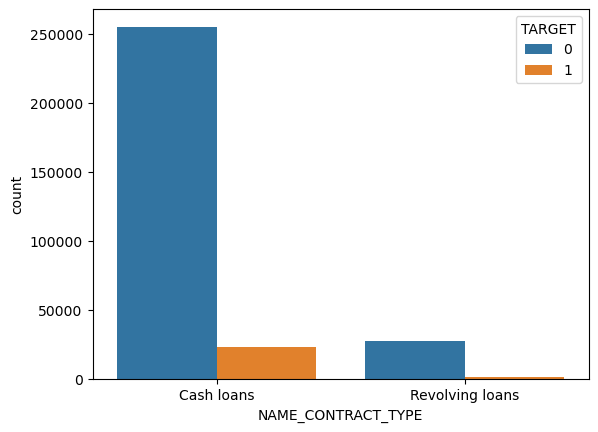

In [99]:
sns.countplot(data=app_ext_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [143]:
data_pct = app_ext_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [111]:
data_pct['pct'] = data_pct['TARGET']*100
data_pct

,NAME_CONTRACT_TYPE,TARGET,pct
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='pct'>

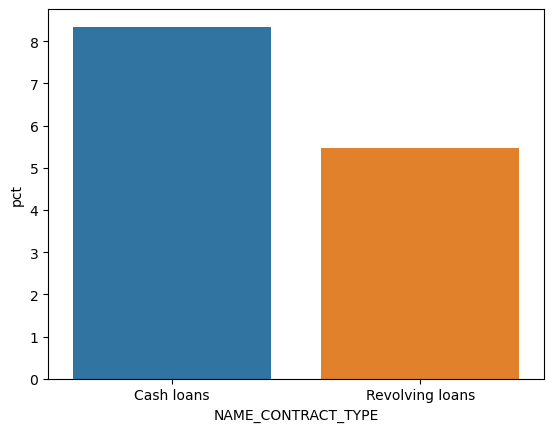

In [112]:
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='pct')

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='pct'>

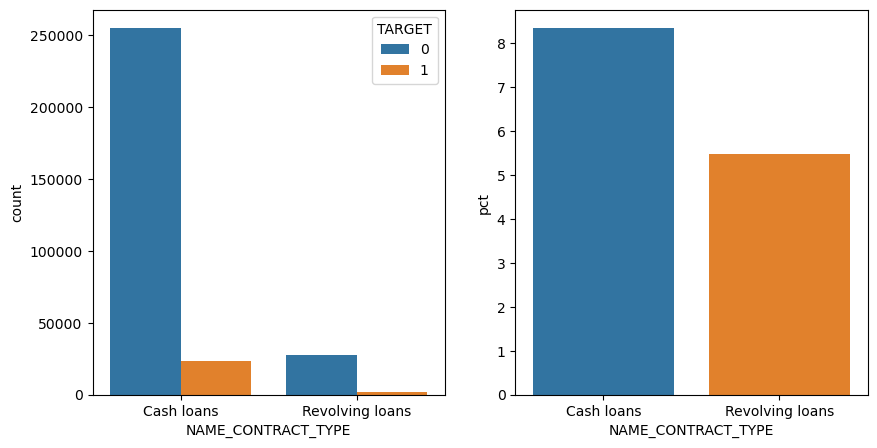

In [115]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_ext_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='pct')

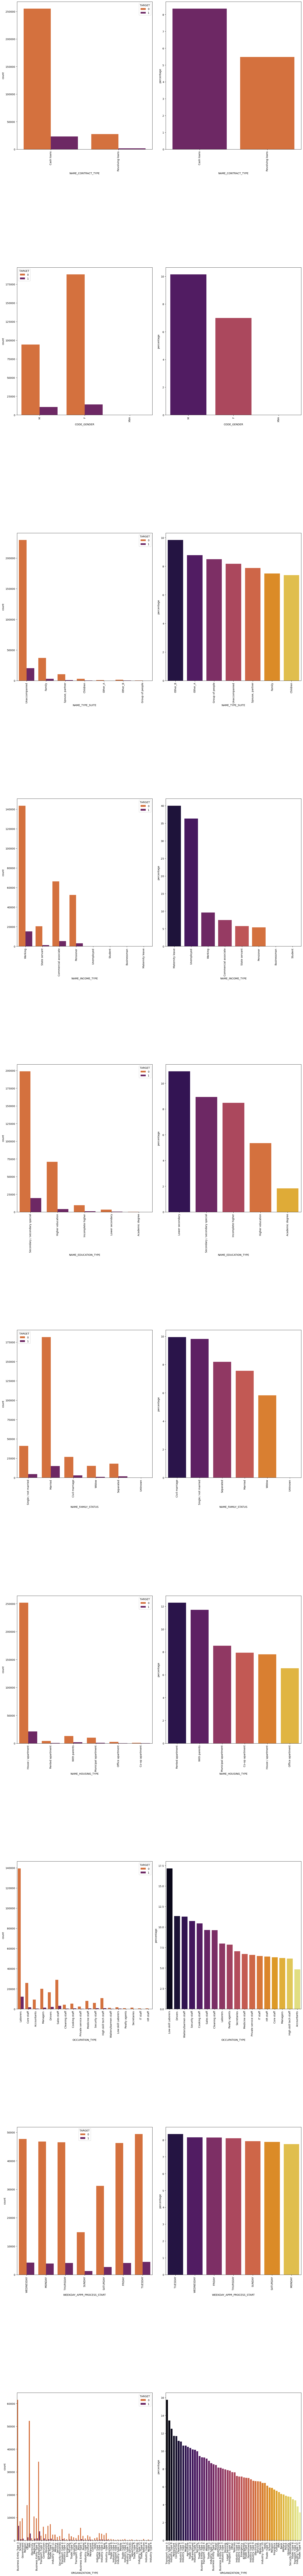

In [141]:

plt.figure(figsize=(20,180))

for i,var in enumerate(obj_var):

    data_pct = app_ext_rmvd[[var,'TARGET']].groupby([var],as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['percentage'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=0.8)
    sns.countplot(data=app_ext_rmvd,x=var,hue='TARGET',palette='inferno_r')
    plt.xticks(rotation=90)
    
    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='percentage',palette='inferno')
    plt.xticks(rotation=90)

In [144]:
num_var = app_ext_rmvd.select_dtypes(include=['float64','int64']).columns
num_var = app_ext_rmvd.select_dtypes(include=['float64','int64','category']).columns

In [147]:
num_data = app_ext_rmvd[num_var].head()
defaulters= num_data[num_data['TARGET']==1]
repayers=num_data[num_data['TARGET']==0]